# **Chapter 2. [텍스트] 뉴스기사 3줄 요약하기**


---
### 📝 **학습 목차**
> 2-1. 프로젝트 개요 <br>
> 2-2. 바이너리 파일을 문자열로 변경 - base64 <br>
> 2-3. 문자열 다루기 - textwrap, re <br>
> 2-4. 단어 개수 구하기 - collections.Counter <br>
> 2-5. 문서 요약하기 - gensim <br>
> 2-6. 텍스트 파일 저장 - open, close <br>
> **2-7. 프로젝트 실습**

## 2-7. 프로젝트 실습 📰

> ### 진행 순서
>  1. 뉴스 기사 (base64 파일) 디코딩
>  2. 문서 요약 / 키워드 추출
>  3. 요약 리포트 작성
>  4. html 파일로 Export

### 2-7-1. 뉴스 기사 (base64 파일) 디코딩

[원본 기사](https://n.news.naver.com/mnews/article/018/0005303739?sid=105)

#### 바이너리 파일 읽기

In [1]:
# 기사 이미지
f = open("news/image", 'rb')
image = f.readlines()
f.close()

In [2]:
print(image)   # base64 인코딩 파일

[b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAHKAocDASIAAhEBAxEB/8QAHgAAAQMFAQEAAAAAAAAAAAAABAIDBQEGBwgJAAr/xABREAABAwIEBAIIBQMDAgQDAREBAgMEBREABhIhBxMxQVFhCBQicYGRofAyscHR4QkVIxZC8VJiFyQzciWSorI0gtLiJkNjChgnNURTg6PC8v/EAB0BAAEFAQEBAQAAAAAAAAAAAAIAAQMEBQYHCAn/xABKEQACAQIEBAQEBAYBAwIDBAsBAhEDIQAEEjEFQVFhEyJx8IGRodEGMrHBFCNCUuHxBxUzYiRyCCVTFzRDY4KSFjU2RGSyc6LS/9oADAMBAAIRAxEAPwDsTDcpUc/4VRfPcb/H4ePXp4Yno1bhsD/CU6b773sO5G/gep+vbCDIJ02F+vTfxxKMAoBAB3Ftge4PTy6D3Y+jm4cGiX1AAiNERMT/AFcwD6d8fPS8UrKQVRVIsCtrWnkelumM5tV2Euydva9k2ULi+1ulh3tv4b4kW5jSk2ZtpIte4OxuN7G1sYRiEJTpBHtCxAPjcdPD8u2LmgynmE2QoBItcXsfMjzH8HFV+GKsALyGkdDI732E9sS0uK1iwWqbGBqk225CN4PPnGMotnWNFvxG3Xp/Hft364lo0ZFgHPwb6r9h2+v67DFnUyqI0hLqhcnY3APb6dfz88Xm1OjqQgGxFt7b7Hf2tiLeeKDUXRirLJG4+Vsa9KvTZRpaSTYd7RJuI78sTcCEgpUGydJ299t/v3YuOPE02G+97EDv4n+ehxEQJ8NCUg2tsOu3T

In [3]:
# 기사 본문
f = open("news/article", 'rb')
article = f.readlines()
f.close()

In [4]:
print(article)   # base64 인코딩 파일

[b'Mjnsnbwo7ZiE7KeA7Iuc6rCEKSDrsJzsgqwg7JiI7KCV7J24IOKAmOyasOyjvOuwnOyCrOyLnOyKpO2FnOKAmShTTFMp66Gc7LyT7J20IOuvuOq1rSDtlIzroZzrpqzri6Tso7wg7LyA64Sk65SUIOyasOyjvOyEvO2EsOydmCDrsJzsgqzrjIAgMzlC7JeQIOyEpOy5mOuPvCDsnojri6QuICjsgqzsp4Q964KY7IKsKQoK64KY7IKs6rCAIOuwnO2RnO2VnCDri6wg7LCp66WZIO2bhOuztOyngC4g64Ko6re5IOu2gOq3vOycvOuhnCDslrzslrTsnojripQg66y87J20IOyeiOyWtCDsnpDsm5Ag6rCc67Cc7J2EIOq4sOuMgO2VoCDsiJgg7J6I64ukLiAo7IKs7KeEPeuCmOyCrCDsoJzqs7UpCgpb7J20642w7J2866asIOygleuLpOyKrCDquLDsnpBdIDIwMjXrhYQg7J2466WY66W8IOuLrOuhnCDrs7TrgrTquLAg7JyE7ZWcIOyyqyDrsojsp7gg7Jes7KCV7J20IO2VmOujqCDslZ7snLzroZwg64uk6rCA7JmU64ukLjI47J28IOuvuOq1rSDtla3qs7XsmrDso7zqta0oTkFTQSnsl5Ag65Sw66W066m0ICjtmITsp4Dsi5zqsIQpIDI37J28IOuvuOq1rSDtlIzroZzrpqzri6Tso7wg7LyA64Sk65SU7Jqw7KO87IS87YSw7JeQ7ISc64qUIOyYpOumrOyYqCDsmrDso7zshKDsnYQg7YOR7J6s7ZWcIOKAmOyasOyjvOuwnOyCrOyLnOyKpO2FnOKAmShTTFMpIOuhnOy8kyDrsJzsgqzrpbwg7JyE7ZWcIOy5tOyatO2KuOuLpOyatOydtCDsi5zsnpHrkJDri6QuIOuzhOuLpOuluCDrs4DsiJjqsIAg7JeG7Jy866m0IFNMU+uKlCAyOeydvCDsm

#### base64 디코딩

In [5]:
# 기사 이미지 디코딩
import base64
file_base64 = image[0]

In [6]:
path = "news/image.jpg"
with open(path, 'wb') as f:
    decoded_data = base64.decodebytes(file_base64)
    f.write(decoded_data)

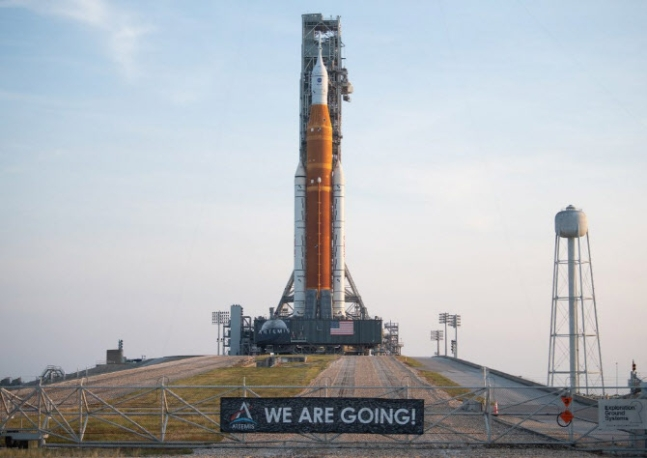

In [8]:
# 이미지 확인
from PIL import Image
img = Image.open(path)
img

In [9]:
# 기사 본문 디코딩
file_base64 = article[0]
decoded_data = base64.decodebytes(file_base64)

In [10]:
decoded_data

b'29\xec\x9d\xbc(\xed\x98\x84\xec\xa7\x80\xec\x8b\x9c\xea\xb0\x84) \xeb\xb0\x9c\xec\x82\xac \xec\x98\x88\xec\xa0\x95\xec\x9d\xb8 \xe2\x80\x98\xec\x9a\xb0\xec\xa3\xbc\xeb\xb0\x9c\xec\x82\xac\xec\x8b\x9c\xec\x8a\xa4\xed\x85\x9c\xe2\x80\x99(SLS)\xeb\xa1\x9c\xec\xbc\x93\xec\x9d\xb4 \xeb\xaf\xb8\xea\xb5\xad \xed\x94\x8c\xeb\xa1\x9c\xeb\xa6\xac\xeb\x8b\xa4\xec\xa3\xbc \xec\xbc\x80\xeb\x84\xa4\xeb\x94\x94 \xec\x9a\xb0\xec\xa3\xbc\xec\x84\xbc\xed\x84\xb0\xec\x9d\x98 \xeb\xb0\x9c\xec\x82\xac\xeb\x8c\x80 39B\xec\x97\x90 \xec\x84\xa4\xec\xb9\x98\xeb\x8f\xbc \xec\x9e\x88\xeb\x8b\xa4. (\xec\x82\xac\xec\xa7\x84=\xeb\x82\x98\xec\x82\xac)\n\n\xeb\x82\x98\xec\x82\xac\xea\xb0\x80 \xeb\xb0\x9c\xed\x91\x9c\xed\x95\x9c \xeb\x8b\xac \xec\xb0\xa9\xeb\xa5\x99 \xed\x9b\x84\xeb\xb3\xb4\xec\xa7\x80. \xeb\x82\xa8\xea\xb7\xb9 \xeb\xb6\x80\xea\xb7\xbc\xec\x9c\xbc\xeb\xa1\x9c \xec\x96\xbc\xec\x96\xb4\xec\x9e\x88\xeb\x8a\x94 \xeb\xac\xbc\xec\x9d\xb4 \xec\x9e\x88\xec\x96\xb4 \xec\x9e\x90\xec\x9b\x90 \xea\xb0\x9c\xeb\x

In [11]:
article = decoded_data.decode('utf-8')

In [12]:
print(article)

29일(현지시간) 발사 예정인 ‘우주발사시스템’(SLS)로켓이 미국 플로리다주 케네디 우주센터의 발사대 39B에 설치돼 있다. (사진=나사)

나사가 발표한 달 착륙 후보지. 남극 부근으로 얼어있는 물이 있어 자원 개발을 기대할 수 있다. (사진=나사 제공)

[이데일리 정다슬 기자] 2025년 인류를 달로 보내기 위한 첫 번째 여정이 하루 앞으로 다가왔다.28일 미국 항공우주국(NASA)에 따르면 (현지시간) 27일 미국 플로리다주 케네디우주센터에서는 오리온 우주선을 탑재한 ‘우주발사시스템’(SLS) 로켓 발사를 위한 카운트다운이 시작됐다. 별다른 변수가 없으면 SLS는 29일 오전 8시 33분(한국시간 오후 9시 33분) 달을 향해 떠오른다.카운트다운에 돌입한 후, 케네디 우주 센터에는 비와 번개가 쳤다. 다만, 발사대에는 피뢰침이 설치된 상태로 SLS에는 영향은 없는 것으로 알려졌다. 기상팀은 현재 구체적인 영향을 분석 중이다. 나사는 발사 당일인 29일에는 날씨가 갤 확률이 70% 이상이라고 보고 있다.나사는 발사 8시간 전, 즉 29일 자정쯤에 SLS에 연료(액체수소)와 산화제(액체산소)를 주입하는 절차를 시작한다. 액체연료는 미리 동체에 주입하면 부식을 일으킬 염려가 있다. 이 때문에 연료 주입은 발사 직전에 실행한다.발사 10분 전에는 외부에서 들어가던 전력을 오리온과 SLS가 스스로 공급하도록 전환한다. 그리고 카운트다운이 ‘0’이 되는 29일 오전 8시33분에 아르테미스 1호는 힘차게 달을 향해 날아오른다.기술적인 문제나 날씨 등의 외부변수로 29일 발사가 이뤄지지 않을 경우 나사는 다음 발사날짜를 9월 2일과 9월 5일로 예정했다.아르테미스는 42일 동안 약 지구와 달 사이의 거리인 209만 2148km를 여행할 예정이다. 연료를 꽉 채운 SLS의 무게는 570만파운드며 최대 880만파운드의 추진력을 가진다. 아폴로 우주선을 달로 보낸 새턴 V 로켓보다는 15% 정도 추진력이 강화됐다.이번 아르테미스 1호는 메인 로켓과 사람이 타는 유인캡슐인

### 2-7-2. 문서 요약 / 키워드 추출

In [13]:
from gensim.summarization.summarizer import summarize
from gensim.summarization.textcleaner import split_sentences

#### summarize 함수

In [14]:
# 단어수 기반 요약 (word_count)
print(summarize(article, word_count=50))

[이데일리 정다슬 기자] 2025년 인류를 달로 보내기 위한 첫 번째 여정이 하루 앞으로 다가왔다.28일 미국 항공우주국(NASA)에 따르면 (현지시간) 27일 미국 플로리다주 케네디우주센터에서는 오리온 우주선을 탑재한 ‘우주발사시스템’(SLS) 로켓 발사를 위한 카운트다운이 시작됐다.
오는 10월 10일쯤 미국 샌디에이고 앞 태평양으로 귀환할 예정이다.달에 착륙하는 것 자체가 목표였던 아폴로 계획과는 달리 아르테미스 계획은 달, 더 나아가 화성까지 인류를 진출시키기 위한 담대한 계획의 일환이다.


In [17]:
# 비율 기반 요약 (ratio)
print(summarize(article, ratio=0.1))

[이데일리 정다슬 기자] 2025년 인류를 달로 보내기 위한 첫 번째 여정이 하루 앞으로 다가왔다.28일 미국 항공우주국(NASA)에 따르면 (현지시간) 27일 미국 플로리다주 케네디우주센터에서는 오리온 우주선을 탑재한 ‘우주발사시스템’(SLS) 로켓 발사를 위한 카운트다운이 시작됐다.
오는 10월 10일쯤 미국 샌디에이고 앞 태평양으로 귀환할 예정이다.달에 착륙하는 것 자체가 목표였던 아폴로 계획과는 달리 아르테미스 계획은 달, 더 나아가 화성까지 인류를 진출시키기 위한 담대한 계획의 일환이다.


In [18]:
# 요약 텍스트 저장
article_summarized = summarize(article, ratio=0.1)

#### 키워드 추출

In [19]:
import collections
import textwrap
import re

In [20]:
# 줄바꿈 정렬
article_align = textwrap.fill(article, width=50)
print(article_align)

29일(현지시간) 발사 예정인 ‘우주발사시스템’(SLS)로켓이 미국 플로리다주 케네디
우주센터의 발사대 39B에 설치돼 있다. (사진=나사)  나사가 발표한 달 착륙 후보지.
남극 부근으로 얼어있는 물이 있어 자원 개발을 기대할 수 있다. (사진=나사 제공)
[이데일리 정다슬 기자] 2025년 인류를 달로 보내기 위한 첫 번째 여정이 하루 앞으로
다가왔다.28일 미국 항공우주국(NASA)에 따르면 (현지시간) 27일 미국 플로리다주
케네디우주센터에서는 오리온 우주선을 탑재한 ‘우주발사시스템’(SLS) 로켓 발사를 위한
카운트다운이 시작됐다. 별다른 변수가 없으면 SLS는 29일 오전 8시 33분(한국시간
오후 9시 33분) 달을 향해 떠오른다.카운트다운에 돌입한 후, 케네디 우주 센터에는 비와
번개가 쳤다. 다만, 발사대에는 피뢰침이 설치된 상태로 SLS에는 영향은 없는 것으로
알려졌다. 기상팀은 현재 구체적인 영향을 분석 중이다. 나사는 발사 당일인 29일에는
날씨가 갤 확률이 70% 이상이라고 보고 있다.나사는 발사 8시간 전, 즉 29일 자정쯤에
SLS에 연료(액체수소)와 산화제(액체산소)를 주입하는 절차를 시작한다. 액체연료는 미리
동체에 주입하면 부식을 일으킬 염려가 있다. 이 때문에 연료 주입은 발사 직전에
실행한다.발사 10분 전에는 외부에서 들어가던 전력을 오리온과 SLS가 스스로 공급하도록
전환한다. 그리고 카운트다운이 ‘0’이 되는 29일 오전 8시33분에 아르테미스 1호는
힘차게 달을 향해 날아오른다.기술적인 문제나 날씨 등의 외부변수로 29일 발사가 이뤄지지
않을 경우 나사는 다음 발사날짜를 9월 2일과 9월 5일로 예정했다.아르테미스는 42일
동안 약 지구와 달 사이의 거리인 209만 2148km를 여행할 예정이다. 연료를 꽉 채운
SLS의 무게는 570만파운드며 최대 880만파운드의 추진력을 가진다. 아폴로 우주선을
달로 보낸 새턴 V 로켓보다는 15% 정도 추진력이 강화됐다.이번 아르테미스 1호는 메인
로켓과 사람이 타는 유인캡슐인 

In [21]:
# 단어 추출
words = re.findall(r'\w+', article_align)
print(words)

['29일', '현지시간', '발사', '예정인', '우주발사시스템', 'SLS', '로켓이', '미국', '플로리다주', '케네디', '우주센터의', '발사대', '39B에', '설치돼', '있다', '사진', '나사', '나사가', '발표한', '달', '착륙', '후보지', '남극', '부근으로', '얼어있는', '물이', '있어', '자원', '개발을', '기대할', '수', '있다', '사진', '나사', '제공', '이데일리', '정다슬', '기자', '2025년', '인류를', '달로', '보내기', '위한', '첫', '번째', '여정이', '하루', '앞으로', '다가왔다', '28일', '미국', '항공우주국', 'NASA', '에', '따르면', '현지시간', '27일', '미국', '플로리다주', '케네디우주센터에서는', '오리온', '우주선을', '탑재한', '우주발사시스템', 'SLS', '로켓', '발사를', '위한', '카운트다운이', '시작됐다', '별다른', '변수가', '없으면', 'SLS는', '29일', '오전', '8시', '33분', '한국시간', '오후', '9시', '33분', '달을', '향해', '떠오른다', '카운트다운에', '돌입한', '후', '케네디', '우주', '센터에는', '비와', '번개가', '쳤다', '다만', '발사대에는', '피뢰침이', '설치된', '상태로', 'SLS에는', '영향은', '없는', '것으로', '알려졌다', '기상팀은', '현재', '구체적인', '영향을', '분석', '중이다', '나사는', '발사', '당일인', '29일에는', '날씨가', '갤', '확률이', '70', '이상이라고', '보고', '있다', '나사는', '발사', '8시간', '전', '즉', '29일', '자정쯤에', 'SLS에', '연료', '액체수소', '와', '산화제', '액체산소', '를', '주입하는', '절차를', '시작한다', '액체연료는', '미리', '동체에', '주입하면', '부

In [22]:
# 빈도수 산출
counter = collections.Counter(words)
print(counter)

Counter({'있다': 8, '달': 7, '발사': 6, '아르테미스': 6, '29일': 5, '우주': 5, '나사는': 5, '미국': 4, '나사': 4, '수': 4, '것으로': 4, '달의': 4, '위한': 3, '로켓': 3, '후': 3, '이': 3, '화성': 3, '현지시간': 2, '우주발사시스템': 2, 'SLS': 2, '플로리다주': 2, '케네디': 2, '사진': 2, '남극': 2, '물이': 2, '인류를': 2, '달로': 2, '따르면': 2, '오리온': 2, '우주선을': 2, '카운트다운이': 2, '오전': 2, '33분': 2, '달을': 2, '향해': 2, '다만': 2, '보고': 2, '전': 2, '연료': 2, '되는': 2, '1호는': 2, '9월': 2, '예정이다': 2, '연료를': 2, '아폴로': 2, '이번': 2, '등을': 2, '임무를': 2, '계획은': 2, '담대한': 2, '우주비행사를': 2, '상공을': 2, '건설한다': 2, '같은': 2, '있기': 2, '때문이다': 2, '로봇을': 2, '있게': 2, '비용이': 2, '2030년대': 2, '예정인': 1, '로켓이': 1, '우주센터의': 1, '발사대': 1, '39B에': 1, '설치돼': 1, '나사가': 1, '발표한': 1, '착륙': 1, '후보지': 1, '부근으로': 1, '얼어있는': 1, '있어': 1, '자원': 1, '개발을': 1, '기대할': 1, '제공': 1, '이데일리': 1, '정다슬': 1, '기자': 1, '2025년': 1, '보내기': 1, '첫': 1, '번째': 1, '여정이': 1, '하루': 1, '앞으로': 1, '다가왔다': 1, '28일': 1, '항공우주국': 1, 'NASA': 1, '에': 1, '27일': 1, '케네디우주센터에서는': 1, '탑재한': 1, '발사를': 1, '시작됐다': 1, '별다른': 1, '변수가': 1, '없으면':

In [23]:
# 키워드 추출
print(counter.most_common(5))

[('있다', 8), ('달', 7), ('발사', 6), ('아르테미스', 6), ('29일', 5)]


In [24]:
keywords = counter.most_common(5)[1:]

### 2-7-2. 요약 리포트 작성

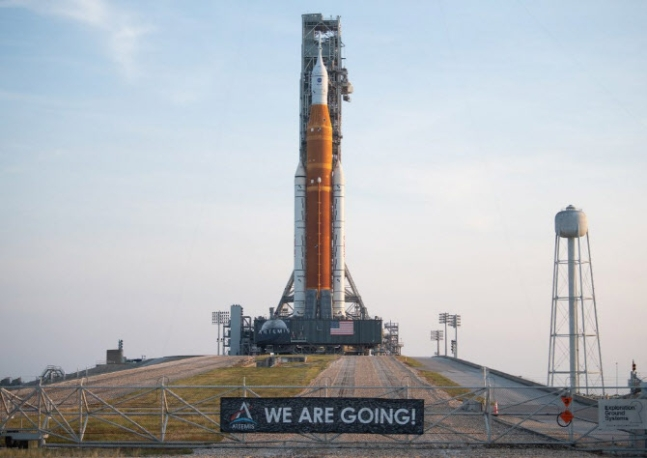

In [25]:
from IPython.display import Image
Image(filename=path, width=300)

In [26]:
print(article_summarized)

[이데일리 정다슬 기자] 2025년 인류를 달로 보내기 위한 첫 번째 여정이 하루 앞으로 다가왔다.28일 미국 항공우주국(NASA)에 따르면 (현지시간) 27일 미국 플로리다주 케네디우주센터에서는 오리온 우주선을 탑재한 ‘우주발사시스템’(SLS) 로켓 발사를 위한 카운트다운이 시작됐다.
오는 10월 10일쯤 미국 샌디에이고 앞 태평양으로 귀환할 예정이다.달에 착륙하는 것 자체가 목표였던 아폴로 계획과는 달리 아르테미스 계획은 달, 더 나아가 화성까지 인류를 진출시키기 위한 담대한 계획의 일환이다.


In [27]:
keys = ['# ' + elem[0] for elem in keywords]
keys = ' '.join(keys)
print(keys)

# 달 # 발사 # 아르테미스 # 29일


### 2-7-4. html 파일로 저장

[원본 기사](https://n.news.naver.com/mnews/article/018/0005303739?sid=105)

In [28]:
# html 파일 저장
htmlfile = open("news/summary.html", "w")
htmlfile.write("<html>\n")
htmlfile.write ("<h1>"+ '카운트다운 들어간 아르테미스 계획…"달의 여신"은 미소지을까' + "</h2>\n") 
htmlfile.write ("<img src='image.jpg'/>\n")
htmlfile.write ("<h2>"+ article_summarized + "</h2>\n") 
htmlfile.write ("<h2 style='background-color:powderblue;''>"+ keys + "</h2>\n") 
htmlfile.write("</html>\n")
htmlfile.close()